In [18]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

### Reading of the files

In [33]:
# Show all wav files in test and train
results_directory = '../models/'
files = sorted(glob.glob(os.path.join(results_directory, '*.txt')))
print(files)

['../models/cnn_lr-0.001_bs-64_do-0.2.txt', '../models/cnn_lr-0.001_bs-64_do-0.2_logs.txt', '../models/cnn_lr-0.001_bs-64_do-0.4.txt', '../models/cnn_lr-0.001_bs-64_do-0.4_logs.txt', '../models/cnn_lr-0.001_bs-64_do-0.6.txt', '../models/cnn_lr-0.001_bs-64_do-0.6_logs.txt', '../models/cnn_lr-0.01_bs-128_do-0.2.txt', '../models/cnn_lr-0.01_bs-128_do-0.2_logs.txt', '../models/cnn_lr-0.01_bs-128_do-0.4.txt', '../models/cnn_lr-0.01_bs-128_do-0.4_logs.txt', '../models/cnn_lr-0.01_bs-64_do-0.2.txt', '../models/cnn_lr-0.01_bs-64_do-0.2_logs.txt', '../models/cnn_lr-0.01_bs-64_do-0.4.txt', '../models/cnn_lr-0.01_bs-64_do-0.4_logs.txt', '../models/cnn_lr-0.01_bs-64_do-0.6.txt', '../models/cnn_lr-0.01_bs-64_do-0.6_logs.txt']


### Function to read metric_file and plot bar graphs

In [118]:
def read_metric_file(path):
    TP, TN, FP, FN, F1, F2, MAP = None, None, None, None, None, None, 0
    with open(path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split(': ')
            metric_name, metric_value = parts[0], parts[1]
            if metric_name == 'TP':
                TP = metric_value
            elif metric_name == 'TN':
                TN = metric_value
            elif metric_name == 'FP':
                FP = metric_value
            elif metric_name == 'FN':
                FN = metric_value
            elif metric_name == 'F1 Score':
                F1 = metric_value
            elif metric_name == 'F2 Score':
                F2 = metric_value
            elif metric_name == 'Mean Average Precision (MAP)':
                MAP = metric_value
        
        return F1, F2, MAP

def plot_graph(x, y, title):
    plt.figure(figsize=(4, 2))
    plt.bar(x, y)
    plt.title(title)
    plt.show()

def plot_hm(data, x_labels, y_labels, title, xaxis, yaxis):
    plt.figure(figsize=(4, 2))
    plt.imshow(data, cmap='magma', interpolation='nearest')
    plt.xticks(np.arange(len(x_labels)), x_labels)
    plt.yticks(np.arange(len(y_labels)), y_labels)
    plt.colorbar()
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)
    plt.show()


### Impact of hyperparameters on Mean Average Precision

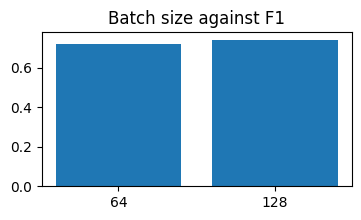

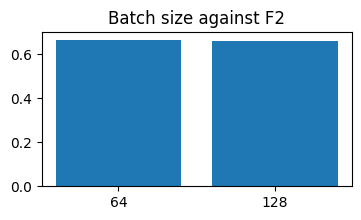

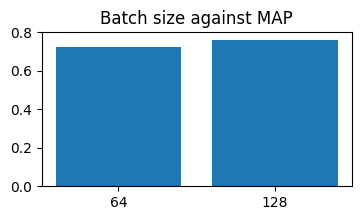

In [96]:
batch_sizes = ['64', '128']
avg_F1, avg_F2, avg_MAP = [], [], []
for batch_size in batch_sizes:
    all_MAP = []
    all_F1 = []
    all_F2 = []
    for file in files:
        if f'bs-{batch_size}' in file and 'logs' not in file:  # checking of "logs" is a mistake on our part due to misnaming
            F1, F2, MAP = read_metric_file(file)
            all_F1.append(float(F1))
            all_F2.append(float(F2))
            all_MAP.append(float(MAP))
    avg_F1.append(np.mean(np.array(all_F1)))
    avg_F2.append(np.mean(np.array(all_F2)))
    avg_MAP.append(np.mean(np.array(all_MAP)))
    

plot_graph(batch_sizes, avg_F1, 'Batch size against F1')
plot_graph(batch_sizes, avg_F2, 'Batch size against F2')
plot_graph(batch_sizes, avg_MAP, 'Batch size against MAP')

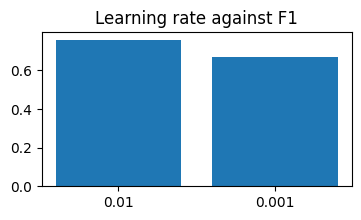

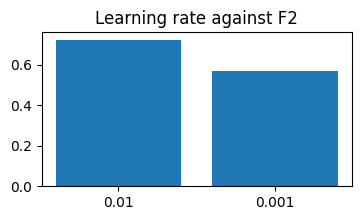

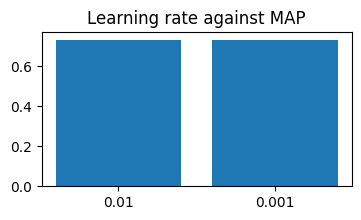

In [97]:
learning_rates = ['0.01', '0.001']
avg_F1, avg_F2, avg_MAP = [], [], []
for lr in learning_rates:
    all_MAP = []
    all_F1 = []
    all_F2 = []
    for file in files:
        if f'lr-{lr}' in file and 'logs' not in file:  # checking of "logs" is a mistake on our part due to misnaming
            F1, F2, MAP = read_metric_file(file)
            all_F1.append(float(F1))
            all_F2.append(float(F2))
            all_MAP.append(float(MAP))
    avg_F1.append(np.mean(np.array(all_F1)))
    avg_F2.append(np.mean(np.array(all_F2)))
    avg_MAP.append(np.mean(np.array(all_MAP)))
    
plot_graph(learning_rates, avg_F1, 'Learning rate against F1')
plot_graph(learning_rates, avg_F2, 'Learning rate against F2')
plot_graph(learning_rates, avg_MAP, 'Learning rate against MAP')

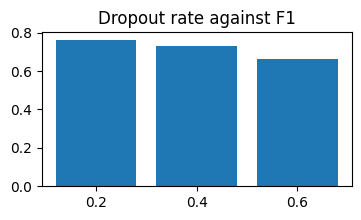

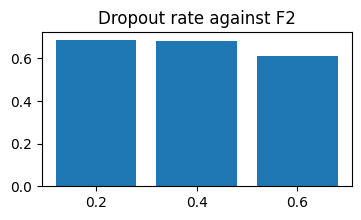

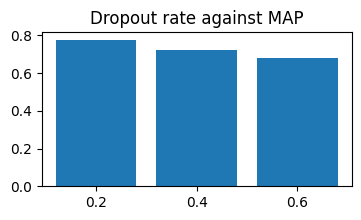

In [98]:
dropout_rates = ['0.2', '0.4', '0.6']
avg_F1, avg_F2, avg_MAP = [], [], []
for do in dropout_rates:
    all_MAP = []
    all_F1 = []
    all_F2 = []
    for file in files:
        if f'do-{do}' in file and 'logs' not in file:  # checking of "logs" is a mistake on our part due to misnaming
            F1, F2, MAP = read_metric_file(file)
            all_F1.append(float(F1))
            all_F2.append(float(F2))
            all_MAP.append(float(MAP))
    avg_F1.append(np.mean(np.array(all_F1)))
    avg_F2.append(np.mean(np.array(all_F2)))
    avg_MAP.append(np.mean(np.array(all_MAP)))
    
plot_graph(dropout_rates, avg_F1, 'Dropout rate against F1')
plot_graph(dropout_rates, avg_F2, 'Dropout rate against F2')
plot_graph(dropout_rates, avg_MAP, 'Dropout rate against MAP')

### Heatmap of pairs of hyperparameters on Mean Average Precision

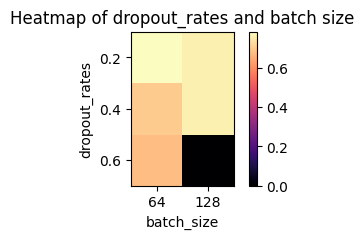

In [123]:
do_bs = np.zeros((len(dropout_rates),len(batch_sizes)))
# print(do_)
for idx1,do in enumerate(dropout_rates):
    for idx2,bs in enumerate(batch_sizes):
        vals = []
        for file in files:
            if f'do-{do}' in file and f'bs-{bs}' in file and 'logs' not in file:  # checking of "logs" is a mistake on our part due to misnaming
                F1, F2, MAP = read_metric_file(file)
                vals.append(float(MAP))
        
        if not vals:
            avg_val = 0
        else:
            avg_val = np.mean(np.array(vals))
        do_bs[idx1, idx2] = avg_val

plot_hm(do_bs, y_labels=dropout_rates, x_labels=batch_sizes, yaxis='dropout_rates', xaxis='batch_size', title='Heatmap of dropout_rates and batch size')

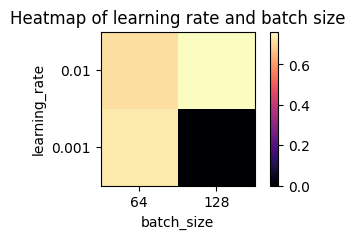

In [124]:
lr_bs = np.zeros((len(learning_rates),len(batch_sizes)))
for idx1,lr in enumerate(learning_rates):
    for idx2,bs in enumerate(batch_sizes):
        vals = []
        for file in files:
            if f'lr-{lr}' in file and f'bs-{bs}' in file and 'logs' not in file:  # checking of "logs" is a mistake on our part due to misnaming
                F1, F2, MAP = read_metric_file(file)
                vals.append(float(MAP))
        
        if not vals:
            avg_val = 0
        else:
            avg_val = np.mean(np.array(vals))
        lr_bs[idx1, idx2] = avg_val

plot_hm(lr_bs, y_labels=learning_rates, x_labels=batch_sizes, yaxis='learning_rate', xaxis='batch_size', title='Heatmap of learning rate and batch size')

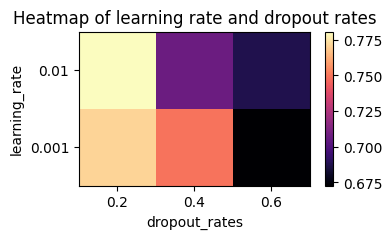

In [126]:
lr_do = np.zeros((len(learning_rates),len(dropout_rates)))
for idx1,lr in enumerate(learning_rates):
    for idx2,do in enumerate(dropout_rates):
        vals = []
        for file in files:
            if f'lr-{lr}' in file and f'do-{do}' in file and 'logs' not in file:  # checking of "logs" is a mistake on our part due to misnaming
                F1, F2, MAP = read_metric_file(file)
                vals.append(float(MAP))
        
        if not vals:
            avg_val = 0
        else:
            avg_val = np.mean(np.array(vals))
        lr_do[idx1, idx2] = avg_val

plot_hm(lr_do, y_labels=learning_rates, x_labels=dropout_rates, yaxis='learning_rate', xaxis='dropout_rates', title='Heatmap of learning rate and dropout rates')